# 1. Introduction of Docker

## 1.1 The History of Docker

Docker 最初是 dotCloud 公司创始人 Solomon Hykes 在法国期间发起的一个公司内部项目，它是基于 dotCloud 公司多年云服务技术的一次革新，并于 2013 年 3 月以 Apache 2.0 授权协议开源 ，主要项目代码在 GitHub 上进行维护。Docker 项目后来还加入了 Linux 基金会，并成立推动 开放容器联盟（OCI）。

Docker 自开源后受到广泛的关注和讨论，至今其 GitHub 项目已经超过 60k个星标和17.3k个 fork。甚至由于 Docker 项目的火爆，在 2013 年底，dotCloud 公司决定改名为 Docker。Docker 最初是在 Ubuntu 12.04 上开发实现的；Red Hat 则从 RHEL 6.5 开始对 Docker 进行支持；Google 也在其 PaaS 产品中广泛应用 Docker。

Docker 使用 Google 公司推出的 Go 语言进行开发实现，基于 Linux 内核的 **cgroup**，**namespace**，以及 OverlayFS类的 **Union FS** 等技术，对进程进行封装隔离，属于**操作系统层面的虚拟化技术 (Operating system–level virtualization)**。由于隔离的进程独立于宿主和其它的隔离的进程，因此也称其为容器。最初实现是基于 LXC，从 0.7 版本以后开始去除 LXC，转而使用自行开发的 libcontainer，从 1.11 版本开始，则进一步演进为使用 runC和 containerd。

### 1.1.1 Intro. of cgroups, namespace, Union FS and Operating System–level Virtualization

**cgroups**，其名称源自控制组群（英语：control groups）的简写，是Linux内核的一个功能，用来限制、控制与分离一个进程组的资源（如CPU、内存、磁盘输入输出等）

**namespace**, are a feature of the Linux kernel that partitions kernel resources such that one set of processes sees one set of resources while another set of processes sees a different set of resources.

**Union FS**, is a way of combining multiple directories into one that appears to contain their combined contents

**操作系统层面的虚拟化技术 (Operating system–level virtualization)**, 亦称容器化（英语：Containerization），是一种虚拟化技术，这种技术将操作系统内核虚拟化，可以允许用户空间软件实例（instances）被分割成几个独立的单元，在内核中运行，而不是只有一个单一实例运行。

这个软件实例，也被称为是一个容器（containers），虚拟引擎（Virtualization engine），虚拟专用服务器（virtual private servers）或是 jails。对每个行程的拥有者与用户来说，他们使用的服务器程序，看起来就像是自己专用的

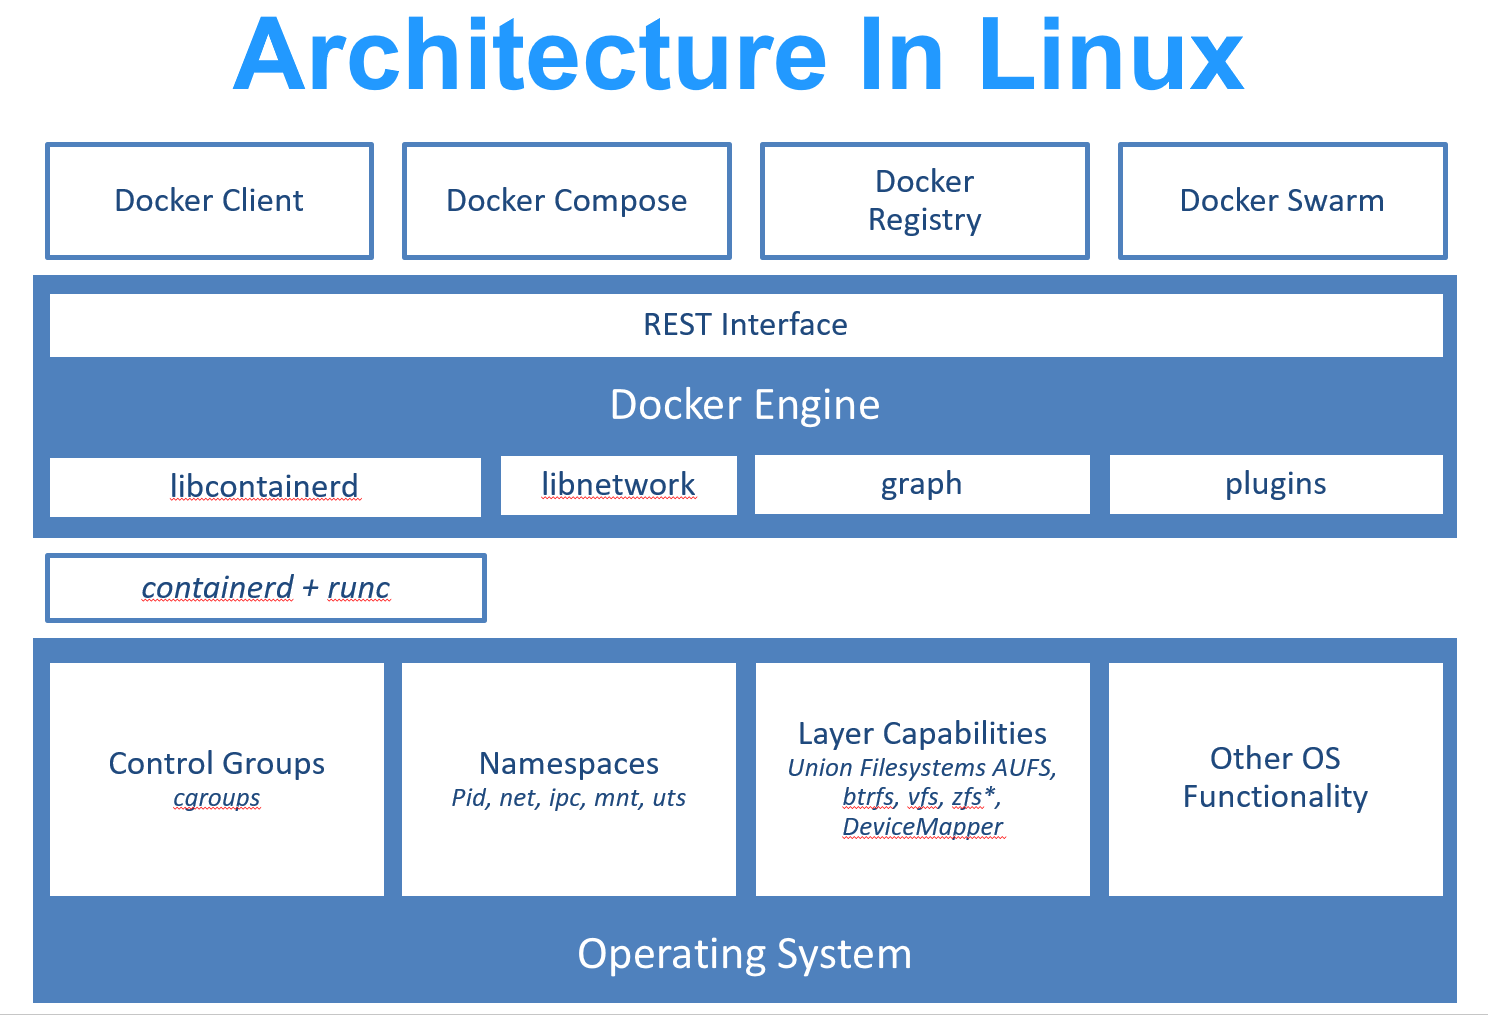

**runc** 是一个 Linux 命令行工具，用于根据 OCI容器运行时规范 (opens new window)创建和运行容器。

**containerd** 是一个守护程序，它管理容器生命周期，提供了在一个节点上执行容器和管理镜像的最小功能集

Docker 在容器的基础上，进行了进一步的封装，从文件系统、网络互联到进程隔离等等，极大的简化了容器的创建和维护。使得 Docker 技术比虚拟机技术更为轻便、快捷。

下面的图片比较了 Docker 和传统虚拟化方式的不同之处。传统虚拟机技术是虚拟出一套硬件后，在其上运行一个完整操作系统，在该系统上再运行所需应用进程；而容器内的应用进程直接运行于宿主的内核，容器内没有自己的内核，而且也没有进行硬件虚拟。因此容器要比传统虚拟机更为轻便。

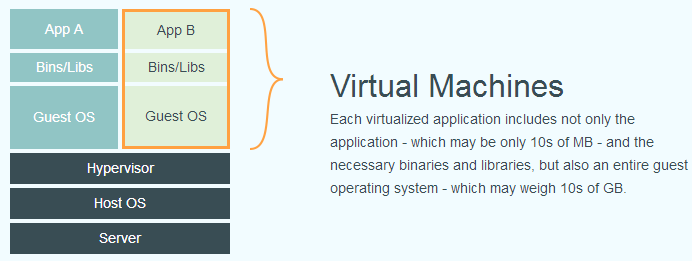

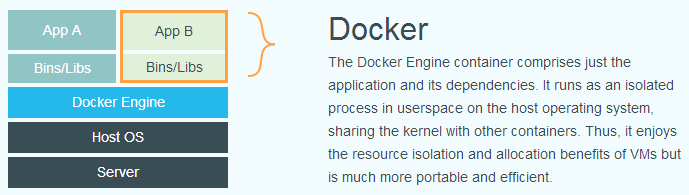

从上面的图中可以看到，虚拟机在宿主机(host)中的OS上面是hypervisor(hypervisor)，然后依次建立虚拟机，虚拟化的仓库，然后安装程序。但是对于Docker来说，在宿主机(host)中的OS上面是Docker Engine，然后直接在Doker Engine安装应用。



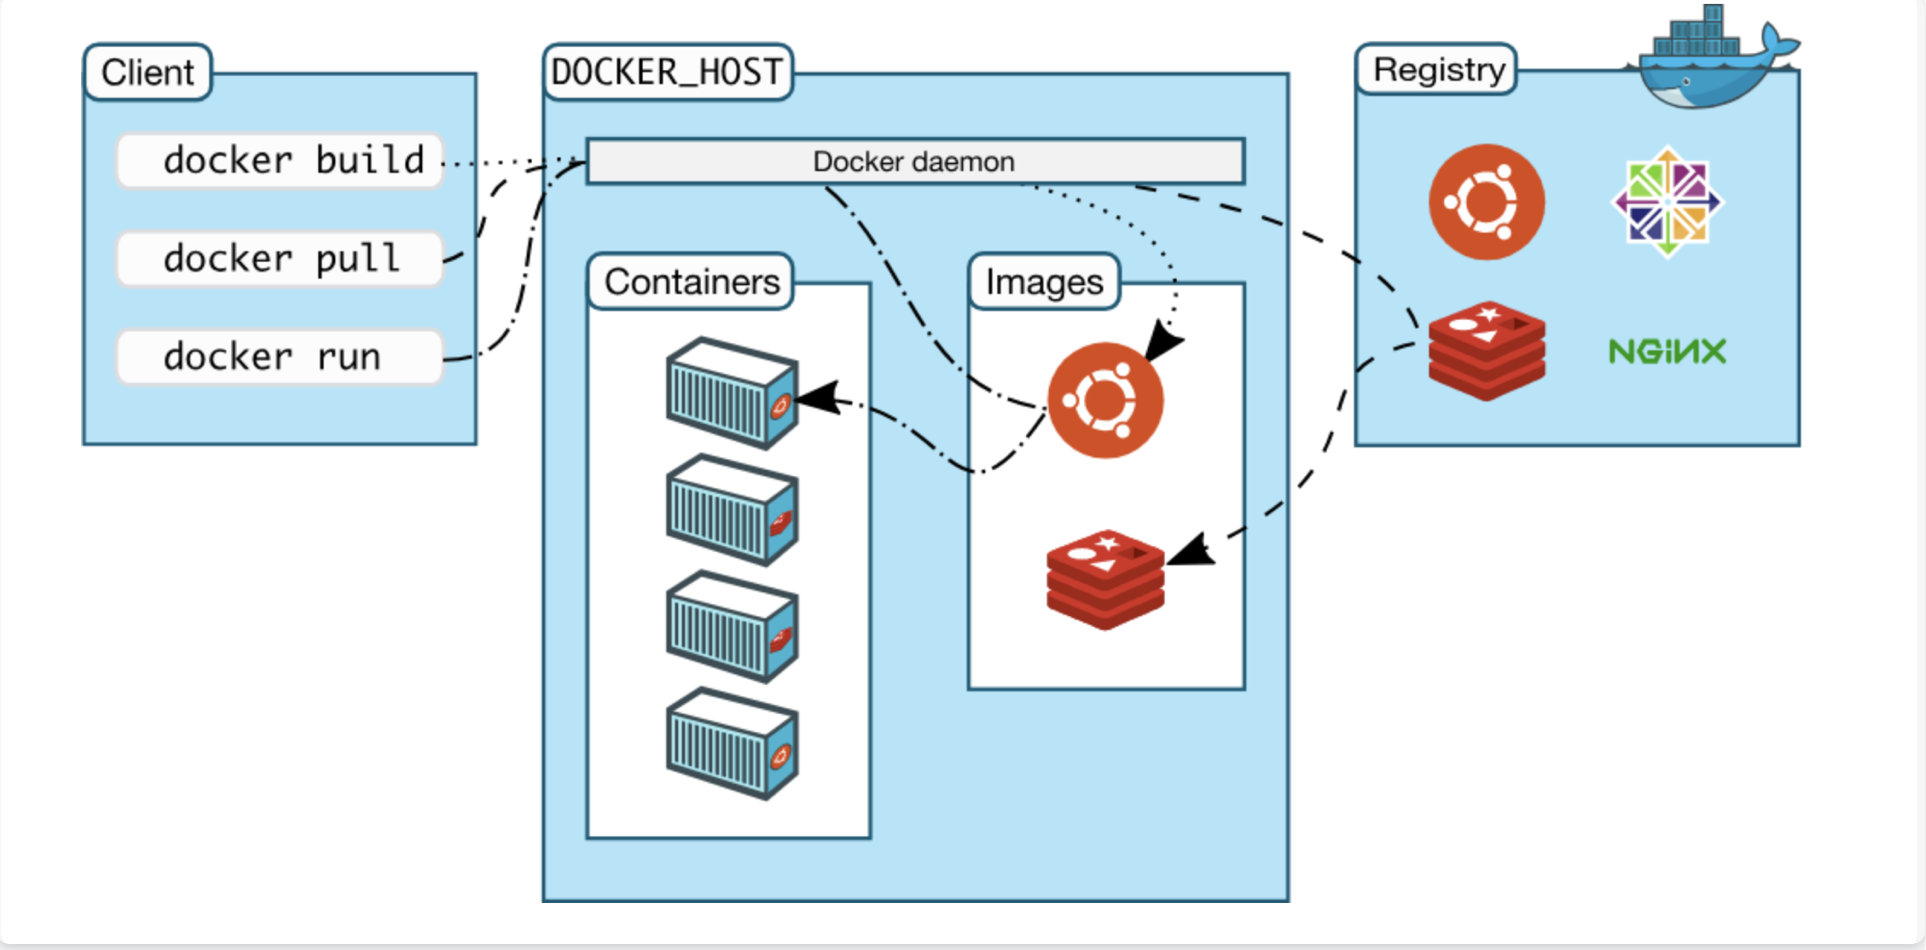

## 1.2 3 Components of Docker

Docker 包括三个基本概念

**镜像（Image）**

**容器（Container）**

**仓库（Repository）**

理解了这三个概念，就理解了 Docker 的整个生命周期。

### 1.2.1 Image

我们都知道，操作系统分为 内核 和 用户空间。对于 Linux 而言，内核启动后，会挂载 root 文件系统为其提供用户空间支持。而 Docker 镜像（Image），就相当于是一个 root 文件系统。比如官方镜像 ubuntu:18.04 就包含了完整的一套 Ubuntu 18.04 最小系统的 root 文件系统。

Docker 镜像 是一个特殊的文件系统，除了提供容器运行时所需的程序、库、资源、配置等文件外，还包含了一些为运行时准备的一些配置参数（如匿名卷、环境变量、用户等）。镜像 不包含 任何动态数据，其内容在构建之后也不会被改变。

#### 1.2.1.1 分层存储

因为镜像包含操作系统完整的 root 文件系统，其体积往往是庞大的，因此在 Docker 设计时，就充分利用 **Union FS**的技术，将其设计为分层存储的架构。所以严格来说，镜像并非是像一个 ISO 那样的打包文件，镜像只是一个虚拟的概念，其实际体现并非由一个文件组成，而是由一组文件系统组成，或者说，由多层文件系统联合组成。

镜像构建时，会一层层构建，前一层是后一层的基础。每一层构建完就不会再发生改变，后一层上的任何改变只发生在自己这一层。比如，删除前一层文件的操作，实际不是真的删除前一层的文件，而是仅在当前层标记为该文件已删除。在最终容器运行的时候，虽然不会看到这个文件，但是实际上该文件会一直跟随镜像。因此，在构建镜像的时候，需要额外小心，每一层尽量只包含该层需要添加的东西，任何额外的东西应该在该层构建结束前清理掉。

分层存储的特征还使得镜像的复用、定制变的更为容易。甚至可以用之前构建好的镜像作为基础层，然后进一步添加新的层，以定制自己所需的内容，构建新的镜像。

关于镜像构建，将会在后续相关章节中做进一步的讲解。

### 1.2.2 Container

镜像（Image）和容器（Container）的关系，就像是面向对象程序设计中的 类 和 实例 一样，镜像是静态的定义，容器是镜像运行时的实体。容器可以被创建、启动、停止、删除、暂停等。

容器的实质是进程，但与直接在宿主执行的进程不同，容器进程运行于属于自己的独立的 命名空间 (namespaces)。因此容器可以拥有自己的 root 文件系统、自己的网络配置、自己的进程空间，甚至自己的用户 ID 空间。容器内的进程是运行在一个隔离的环境里，使用起来，就好像是在一个独立于宿主的系统下操作一样。这种特性使得容器封装的应用比直接在宿主运行更加安全。也因为这种隔离的特性，很多人初学 Docker 时常常会混淆容器和虚拟机。

前面讲过镜像使用的是分层存储，容器也是如此。每一个容器运行时，是以镜像为基础层，在其上创建一个当前容器的存储层，我们可以称这个为容器运行时读写而准备的存储层为 容器存储层。

容器存储层的生存周期和容器一样，容器消亡时，容器存储层也随之消亡。因此，任何保存于容器存储层的信息都会随容器删除而丢失。

按照 Docker 最佳实践的要求，容器不应该向其存储层内写入任何数据，容器存储层要保持无状态化。所有的文件写入操作，都应该使用 数据卷（Volume）、或者 绑定宿主目录，在这些位置的读写会跳过容器存储层，直接对宿主（或网络存储）发生读写，其性能和稳定性更高。

数据卷的生存周期独立于容器，容器消亡，数据卷不会消亡。因此，使用数据卷后，容器删除或者重新运行之后，数据却不会丢失。

### 1.2.3 Docker Registry

镜像构建完成后，可以很容易的在当前宿主机上运行，但是，如果需要在其它服务器上使用这个镜像，我们就需要一个集中的存储、分发镜像的服务，Docker Registry 就是这样的服务。

一个 Docker Registry 中可以包含多个 **仓库（Repository）**；每个仓库可以包含多个 **标签（Tag）**；每个标签对应一个镜像。

通常，一个仓库会包含同一个软件不同版本的镜像，而标签就常用于对应该软件的各个版本。我们可以通过 <仓库名>:<标签> 的格式来指定具体是这个软件哪个版本的镜像。如果不给出标签，将以 latest 作为默认标签。

以 Ubuntu 镜像 为例，ubuntu 是仓库的名字，其内包含有不同的版本标签，如，16.04, 18.04。我们可以通过 ubuntu:16.04，或者 ubuntu:18.04 来具体指定所需哪个版本的镜像。如果忽略了标签，比如 ubuntu，那将视为 ubuntu:latest。

仓库名经常以 两段式路径 形式出现，比如 jwilder/nginx-proxy，前者往往意味着 Docker Registry 多用户环境下的用户名，后者则往往是对应的软件名。但这并非绝对，取决于所使用的具体 Docker Registry 的软件或服务。

#### 1.2.3.1 Docker Registry 公开服务

Docker Registry 公开服务是开放给用户使用、允许用户管理镜像的 Registry 服务。一般这类公开服务允许用户免费上传、下载公开的镜像，并可能提供收费服务供用户管理私有镜像。

最常使用的 Registry 公开服务是**官方的 Docker Hub**，这也是默认的 Registry，并拥有大量的高质量的 官方镜像。除此以外，还有 Red Hat 的 Quay.io ；Google 的 Google Container Registry，Kubernetes的镜像使用的就是这个服务；代码托管平台 GitHub 推出的 ghcr.io。

由于某些原因，在国内访问这些服务可能会比较慢。国内的一些云服务商提供了针对 **Docker Hub 的镜像服务（Registry Mirror）**，这些镜像服务被称为 加速器。常见的有 阿里云加速器、DaoCloud 加速器等。使用加速器会直接从国内的地址下载 Docker Hub 的镜像，比直接从 Docker Hub 下载速度会提高很多。在 安装 Docker 一节中有详细的配置方法。

国内也有一些云服务商提供类似于 Docker Hub 的公开服务。比如 网易云镜像服务、DaoCloud 镜像市场、**阿里云镜像库**等。

#### 1.2.3.2 私有 Docker Registry

除了使用公开服务外，用户还可以在本地搭建私有 Docker Registry。Docker 官方提供了 Docker Registry (https://hub.docker.com/_/registry/)镜像
可以直接使用做为私有 Registry 服务。在 私有仓库 一节中，会有进一步的搭建私有 Registry 服务的讲解。

开源的 Docker Registry 镜像只提供了 Docker Registry API 的服务端实现，足以支持 docker 命令，不影响使用。但不包含图形界面，以及镜像维护、用户管理、访问控制等高级功能。

除了官方的 Docker Registry 外，还有第三方软件实现了 Docker Registry API，甚至提供了用户界面以及一些高级功能。比如，Harbor 和 Sonatype Nexus。

## 1.3 Install Docker

Done